# PUBG Data Exploration

I will show you how I explore the [PUBG dataset](https://www.kaggle.com/c/pubg-finish-placement-prediction/data)
<img src="https://o.aolcdn.com/images/dims?quality=100&image_uri=http%3A%2F%2Fo.aolcdn.com%2Fhss%2Fstorage%2Fmidas%2Fb0be09f425cc5175fb413bc03c32dd0d%2F206235889%2Fpubg-ed.jpg&client=amp-blogside-v2&signature=88c6b77342cbeb0d25c0dc9d909018136aec1971" alt="Logo Title Text 1" width="800"/>

# Table of Contents

* [Preparation](#1)
* [Initial Exploration](#3)
* [Illegal Match and Player](#4)
* [Feature Engineering](#5)
* [Outlier Detection](#6)
* [Categorical Variables](#7)
* [Preparation for Machine Learning](#8)
* [Feature Importance](#9)
* [Final Random Forest Model](#10)
* [Kaggle Submission](#11)

**Let's Go!**

<img src="https://media.giphy.com/media/xT9IgnOQS8e8uKkflK/giphy.gif" alt="Logo Title Text 2" width="800"/>

# Preparation <a id="1"></a>

First we import the dependencies needed for handling data, visualization and training our model. 

Important dependencies are:
* [Pandas](https://pandas.pydata.org) for their dataframe structures and easy visualization.
* [Matplotlib](https://matplotlib.org) for visualization.
* [Scikit-learn](https://scikit-learn.org/stable) for machine learning.
* [fastai](https://www.fast.ai) for machine learning and feature importance.

In [1]:
# For notebook plotting
%matplotlib inline
# Standard libraries
import os
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set pandas display
pd.options.display.max_rows = 16
pd.options.display.max_columns = 100

Read data

In [2]:
df_data = pd.read_csv("./train_V2.csv")
df_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# Initial Exploration <a id="3"></a>

Let's look at the DataFrame from head to tail.

In [3]:
# First five rows (From Head)
print('First 5 rows: ')
display(df_data.head())

# Last five rows (To Tail)
print('Last 5 rows: ')
display(df_data.tail())

First 5 rows: 


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


Last 5 rows: 


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,0,2,1,78.25,1766,solo-fpp,98,94,1590,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


Summary Statistics of the training data.

In [4]:
# Stats
df_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


Data types, memory usage, shape, etc.

In [5]:
# Types, Data points, memory usage, etc.
df_data.info()

# Check dataframe's shape
print('Shape of training set: ', df_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB
Shape of training set:  (4446966, 29)


Most of columns are numerical values (**int** and **float** type), only column *matchType* has a string type.

In [13]:
df_data.groupby('matchType').count()[['matchId']].sort_values('matchId')

,matchId
matchType,
normal-duo,199
normal-solo,326
crashtpp,371
normal-squad,516
flarefpp,718
normal-solo-fpp,1682
flaretpp,2505
normal-duo-fpp,5489
crashfpp,6287


Because the majority of the game are in regular game. We will only focus on those categories right now.   
Therefore, we only keep “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp” matches in the train.

In [3]:
# pick selected matchtype
match_list = ['solo','duo','squad','solo-fpp','duo-fpp','squad-fpp']
df_data = df_data[df_data['matchType'].isin(match_list)]

### Feature descriptions (From Kaggle)

After manully evalution of each feature, they are 6 categories of feature.  

**Player related**
* Id - Player’s Id
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  
(_They are unique, and not useful in model._)

**Kill and damage related**
* DBNOs - Number of enemy players knocked.
* assists - Number of enemy players this player damaged that were killed by teammates.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* killPlace - Ranking in match of number of enemy players killed.
* killStreaks - Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* roadKills - Number of kills while in a vehicle.
* teamKills - Number of times this player killed a teammate.
* revives - Number of times this player revived teammates.  
(_They are very useful in model. (not including killPlace)_ )

**Distance related**
* rideDistance - Total distance traveled in vehicles measured in meters.
* swimDistance - Total distance traveled by swimming measured in meters.
* walkDistance - Total distance traveled on foot measured in meters.  
(_They are very useful in model._)

**Items related**
* boosts - Number of boost items used.
* heals - Number of healing items used.
* weaponsAcquired - Number of weapons picked up.
* vehicleDestroys - Number of vehicles destroyed.  
(_They are very useful in model._)

**Match related**
* matchDuration - Duration of match in seconds.
* matchId - ID to identify match. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.  
(_matchType has 6 values, each of type of match should have their own model._)   
(_matchId is unique, and not useful in model._)  
(_matchDuration is unknown while during game, but it has a statistical values._)

**Point related**
* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.  
(_They are unknown during the game, so they should be excluded from the features._)

[Source](https://www.kaggle.com/c/pubg-finish-placement-prediction/data)

# Illegal Match <a id="4"></a>

## Remove NaN

Let's check if there are `NaN` value in the DataFrame

In [5]:
df_data.isnull().sum(axis=0)

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
                  ..
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
Length: 29, dtype: int64

There is 1 missing value in 'winPlacePerc'. Let's remove it.

In [4]:
print('before droping, shape:',df_data.shape)
df_data.dropna(inplace=True)
print('after droping, shape:',df_data.shape)

before droping, shape: (4411699, 29)
after droping, shape: (4411698, 29)


## Remove weired group size

Let us view how many group in each groups and remove exceptions.

In [4]:
group_data = df_data.copy()
group_data['groupSize'] = 1

In [5]:
 grouped = (group_data[['matchId','groupId','groupSize','matchType']].
            groupby(['matchId','groupId','matchType']).agg('count').reset_index())
    

In [6]:
grouped.head()

,matchId,groupId,matchType,groupSize
0,0000a43bce5eec,18b16ec699d8b6,squad-fpp,2
1,0000a43bce5eec,236ab9e9c081b9,squad-fpp,6
2,0000a43bce5eec,3a6addfa0df938,squad-fpp,2
3,0000a43bce5eec,4bf06994bd4c9a,squad-fpp,2
4,0000a43bce5eec,4d1bbbc19b9084,squad-fpp,2


In [7]:
# drop groupSize greater than 4 in 'squad' game
droped_squad_groupId = grouped[(grouped['matchType'].isin(['squad','squad-fpp'])) 
                               & (grouped['groupSize']>4)]['groupId']
# drop groupSize greater than 2 in 'duo' game
droped_duo_groupId = grouped[(grouped['matchType'].isin(['duo','duo-fpp'])) 
                             & (grouped['groupSize']>2)]['groupId']
# drop groupSize greater than 1 in 'duo' game
droped_solo_groupId = grouped[(grouped['matchType'].isin(['solo','solo-fpp'])) 
                              & (grouped['groupSize']>1)]['groupId']


In [8]:
droped_groupId = ((df_data['groupId'].isin(droped_squad_groupId.values))
                  | (df_data['groupId'].isin(droped_duo_groupId.values))
                  | (df_data['groupId'].isin(droped_solo_groupId.values)))

In [9]:
df_data = df_data[~droped_groupId]

In [10]:
df_data.shape

(3503107, 29)

# Feature Engineering <a id="5"></a>

In this section, we will use visulizaiton tool to understand the features and distribution.

## Feature Understanding

### The Killer

<img src="https://i.ytimg.com/vi/rnAeX795Jn0/maxresdefault.jpg" alt="The Killers" style="width: 700px;"/>

In [23]:
print(("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}."
      .format(df_data['kills'].mean(),df_data['kills'].quantile(0.99), df_data['kills'].max())))

The average person kills 0.9116 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 33.


Let's plot the kill counts

In [24]:
data = df_data.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99),['kills']] = '8+'

In [25]:
kill_count = data['kills'].astype('str').sort_values()


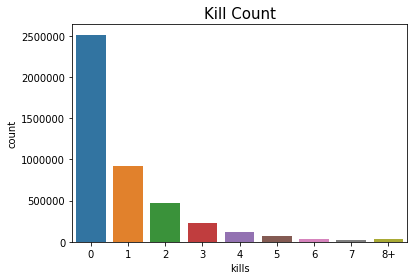

In [26]:
#plt.figure(figsize=(8,6))
sns.countplot(kill_count)
plt.title('Kill Count',fontsize = 15)
plt.show()

Most people can't make a single kill. At least do they do damage?  Notes: damage is stored in column `damageDealt`

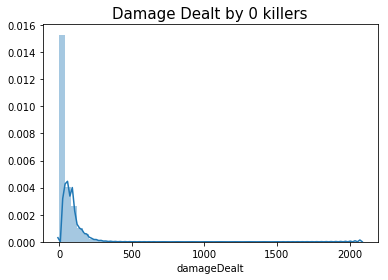

In [27]:
data = df_data.copy()
data = data[data['kills']==0]
#plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

Well, most of them don't. Let's investigate the exceptions.

In [28]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(data)))

data1 = df_data[df_data['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(data)))

16384 players (0.6518%) have won without a single kill!
4675 players (0.1860%) have won without dealing damage!


Plot win placement percentage vs kills.

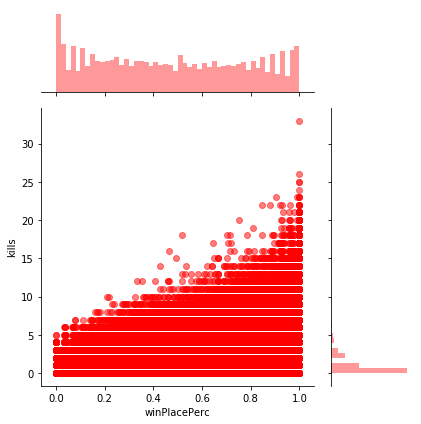

In [29]:
sns.jointplot(x='winPlacePerc',y='kills',data=df_data,height=6,ratio=3,color='r',alpha=0.5)
plt.show()

Apparently killing has a correlation with winning. Finally let's group players based on kills (0 kills, 1-2 kills, 3-5 kills, 6-10 kills and 10+ kills).

In [30]:
kills = df_data.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

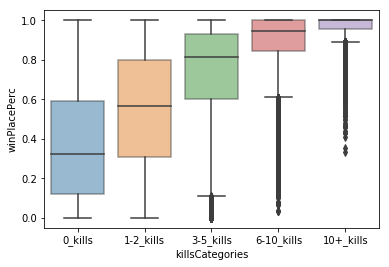

In [31]:
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills , boxprops=dict(alpha=.5))
plt.show()

From what we have discovered , let's write a function to universially discover on different columns

In [32]:
def feature_discovery(data,column=None):
    """ plot and discover on single column of data"""
    # discover average value, 99 percentile and max
    print(("The average person of {} is {:.4f} , 99% of people have {}  or less, while the most value ever recorded is {}."
      .format(str(column),df_data[column].mean(),df_data[column].quantile(0.99), df_data[column].max())))
    
    #plot column distribution   
    plt.title("{} Distribution".format(str(column)),fontsize=15)
    sns.distplot(data[data[column]<data[column].quantile(0.99)][column])
    plt.ylabel('Percentage')
    plt.show()
    
    # get zero values
    print(("{} players ({:.4f}%) get 0 of {}. "
           .format(len(data[data['walkDistance'] == 0]), 100*len(data[data['walkDistance']==0])/len(data),str(column))))
    
    # jointplot of column with winPlacePerc
    sns.jointplot(x="winPlacePerc", y=column,  data=df_data,  ratio=3, color="r")

### The Runners

<img src="https://steemitimages.com/DQmRmYLRxu1vUhVtnFAA6bHFbShtr7Wdv1wLrPjdxbRZsjc/maxresdefault%20(2).jpg" alt="The Runners" style="width: 700px;"/>

In [33]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(df_data['walkDistance'].mean(), df_data['walkDistance'].quantile(0.99), df_data['walkDistance'].max()))

The average person walks for 1153.6m, 99% of people have walked 4395.0m or less, while the marathoner champion walked for 25780.0m.


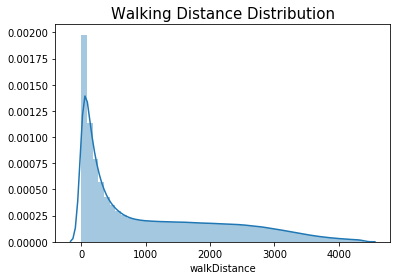

In [34]:
data = df_data.copy()
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [35]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data[data['walkDistance']==0])/len(data)))

97612 players (2.2349%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


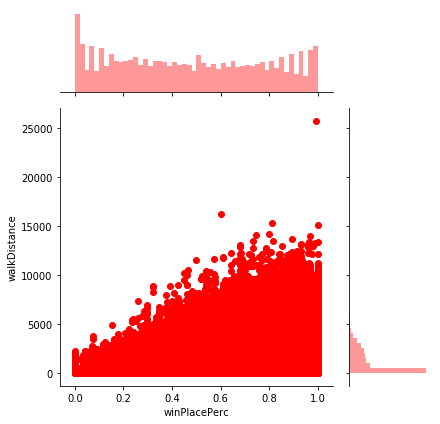

In [36]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df_data,  ratio=3, color="r")
plt.show()

Apparently walking has a high correlation with winPlacePerc.

### The Drivers

<img src="http://cdn.gamer-network.net/2018/metabomb/pubghowtodrivecarsandbikes.jpg" alt="The Drivers" style="width: 700px;"/>

Driver information is in column `rideDistance`.

The average person of rideDistance is 596.1054 , 99% of people have 6922.0  or less, while the most value ever recorded is 40710.0.


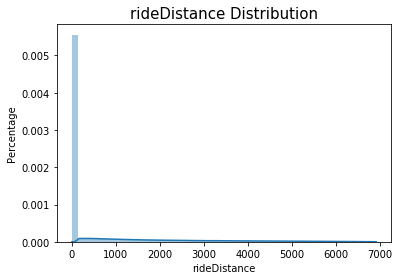

97612 players (2.2126%) get 0 of rideDistance. 


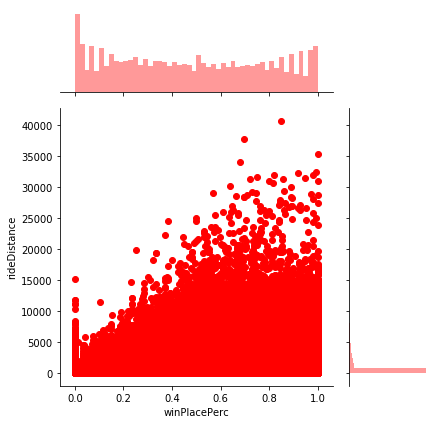

In [37]:
feature_discovery(df_data,column='rideDistance')

###  The Healers

<img src="https://i.ytimg.com/vi/xfI9XljX51k/maxresdefault.jpg" alt="The Healers" style="width: 700px;"/>

column `heals`

The average person of heals is 1.3621 , 99% of people have 12.0  or less, while the most value ever recorded is 80.


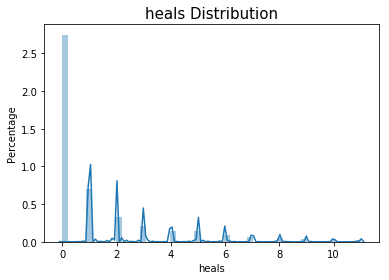

97612 players (2.2126%) get 0 of heals. 


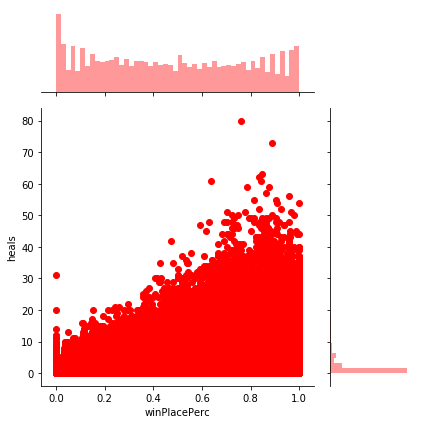

In [38]:
feature_discovery(df_data,column='heals')

### Solos, Duos and Squads

There are 3 game modes in the game. One can play solo, or with a friend (duo), or with 3 other friends (squad). 100 players join the same server, so in the general case (full team case) of duos the max teams are 50 and in the case of squads the max teams are 25. But some of team does not get full members, there are 3 member in a team. So, team number will be slightly higher than 25 for squad game.

In [40]:
df_data['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo'],
      dtype=object)

flaretpp and crashtpp are event mode   
`flare (flare gun) `: Flare Gun can be obtained. A flare gun is a kind of signal that shoots toward the sky. It is a special firearm that supplies a special package (Care Package) when the airplane is deployed to that position when in use.

`crash (Crash Carnage)` : " Road scary is the subject of this week's event mode, where fuel and fire are king." In Crashcanage, there are no firearms, so melee weapons, drones, You have to concentrate on driving skills that can move the Duo to the final round. In this event, the circle moves quite fast, so it quickly crashes on the way to the loot, the vehicle, and the warrior glory of the road. " i.e. It means to win only with a melee weapon without a gun.

In [41]:
solos = df_data[df_data['matchType'].str.contains('solo')]
duos = df_data[df_data['matchType'].str.contains('duo')]
squads = df_data[df_data['matchType'].str.contains('squad')]
print(("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games."
       .format(len(solos), 100*len(solos)/len(df_data), len(duos), 100*len(duos)/len(df_data), len(squads), 100*len(squads)/len(df_data))))

There are 718704 (16.29%) solo games, 1310282 (29.70%) duo games and 2382712 (54.01%) squad games.


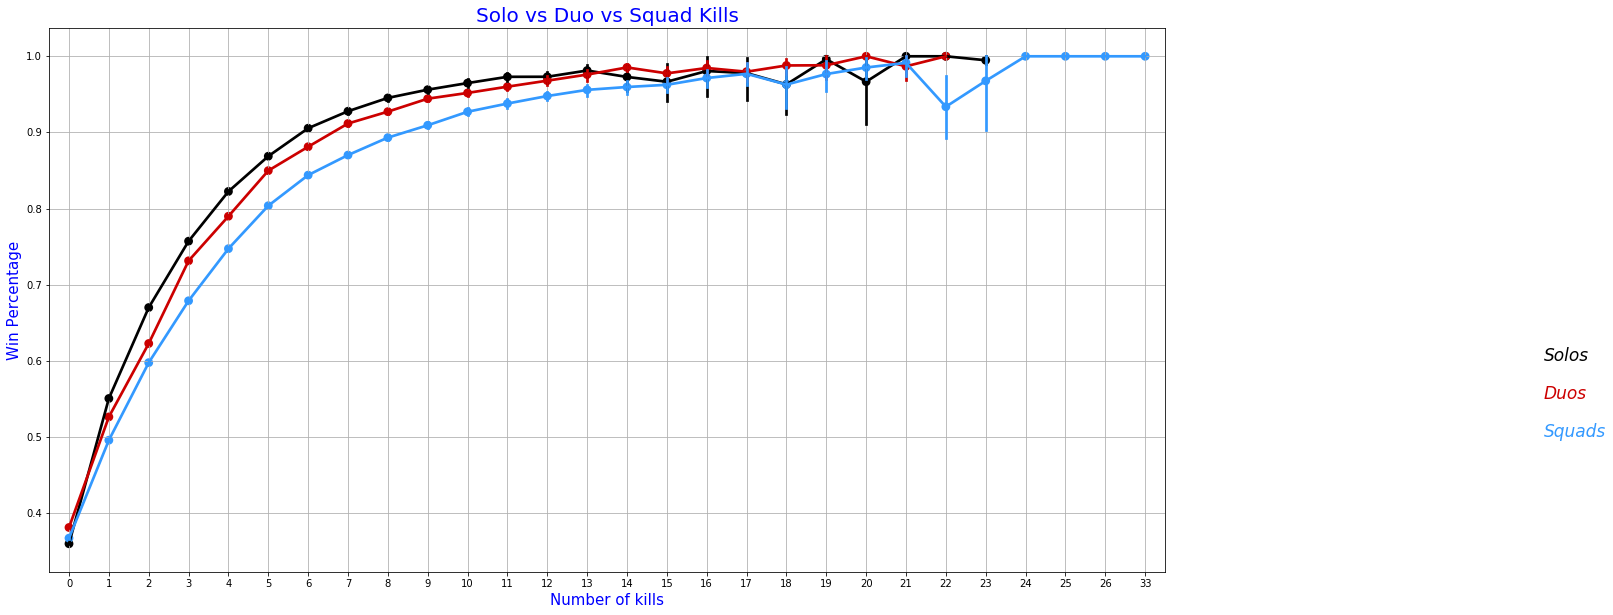

In [42]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

### Pearson correlation between variables

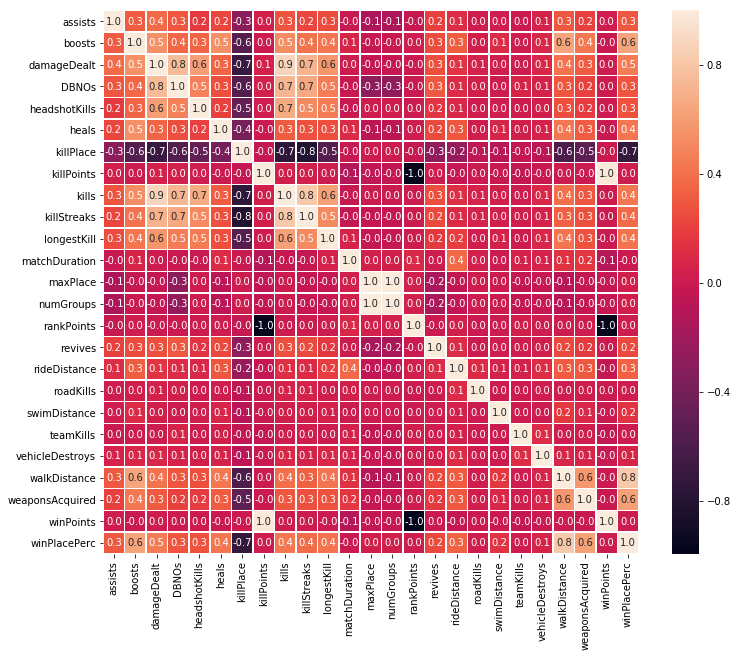

In [43]:
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Feature Engineering

### Players Joined 

This is likely a very valuable feature for our model. If we know how many people are in a match we can normalize other features and get stronger predictions on individual players.

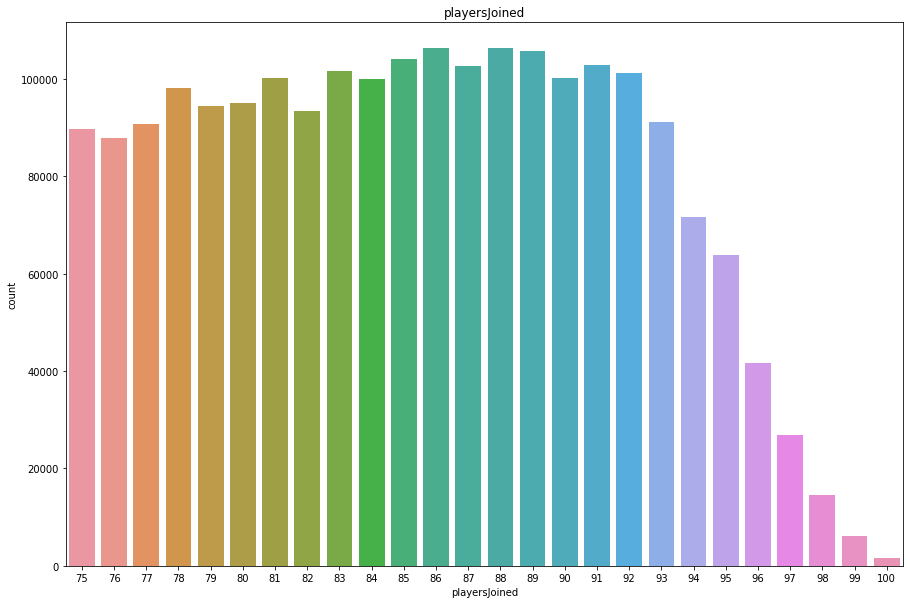

In [11]:
# playersJoined
df_data['playersJoined'] = df_data.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(df_data[df_data['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.show()

Now that we have a feature 'playersJoined' we can normalize other features based on the amount of players. Features that can be valuable to normalize are:  
1. kills
2. damageDealt
3. maxPlace
4. matchDuration

When there are 100 players in the game it might be easier to find and kill someone, than when there are 90 players. So i will normalize the kills in a way that a kill in 100 players will score 1 (as it is) and in 90 players it will score (100-90)/100 + 1 = 1.1. This is just an assumption. You can use different scales.  
Let's try out some things!

In [12]:
# Create normalized features
df_data['killsNorm'] = df_data['kills']*((100-df_data['playersJoined'])/100 + 1)
df_data['damageDealtNorm'] = df_data['damageDealt']*((100-df_data['playersJoined'])/100 + 1)
df_data['maxPlaceNorm'] = df_data['maxPlace']*((100-df_data['playersJoined'])/100 + 1)
df_data['matchDurationNorm'] = df_data['matchDuration']*((100-df_data['playersJoined'])/100 + 1)
# Compare standard features and normalized features
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
df_data[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,37.52,1306,1750.04
1,eef90569b9d03c,0,0.00,91.470,128.97270,26,36.66,1777,2505.57
2,1eaf90ac73de72,0,0.00,68.000,85.68000,50,63.00,1318,1660.68
3,4616d365dd2853,0,0.00,32.900,47.04700,31,44.33,1436,2053.48
4,315c96c26c9aac,1,1.07,100.000,107.00000,97,103.79,1424,1523.68
7,311b84c6ff4390,0,0.00,8.538,9.56256,96,107.52,1967,2203.04
8,1a68204ccf9891,0,0.00,51.600,61.92000,28,33.60,1375,1650.00
9,e5bb5a43587253,0,0.00,37.270,52.92340,29,41.18,1930,2740.60
12,ce4f6ac165705e,0,0.00,0.000,0.00000,29,36.54,1774,2235.24
13,b7807186e3f679,4,4.36,324.200,353.37800,97,105.73,1886,2055.74


# Outlier Detection

Some rows in our dataset have weird characteristics. The players could be cheaters, maniacs or just anomalies. Removing these outliers will likely improve results.

## Kills without movement

This is perhaps the most obvious sign of cheating in the game. It is already fishy if a player hasn't moved during the whole game, but the player could be AFK and got killed. However, if the player managed to get kills without moving it is most likely a cheater.

In [13]:
# Create feature totalDistance
df_data['totalDistance'] = df_data['rideDistance'] + df_data['walkDistance'] + df_data['swimDistance']
# Create feature killsWithoutMoving
df_data['killsWithoutMoving'] = ((df_data['kills'] > 0) & (df_data['totalDistance'] == 0))

In [14]:
# Check players who kills without moving
display(df_data[df_data['killsWithoutMoving'] == True].shape)
df_data[df_data['killsWithoutMoving'] == True].head(10)

(197, 36)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,totalDistance,killsWithoutMoving
50388,85a66d012137c6,882dcca8522981,9fa058d8629fbc,0,0,100.0,0,0,0,44,0,1,1,17.610,1398,solo-fpp,88,83,2116,0,0.0,0,0.0,0,0,0.0,1,0,0.0575,78,1.22,122.0,107.36,1705.56,0.0,True
58577,1ab4e217a226ed,20c0de1c47aa36,b70cd3db21d527,0,0,200.0,0,0,0,22,1819,2,2,7.584,1349,solo-fpp,94,92,-1,0,0.0,0,0.0,0,0,0.0,1,1523,0.0860,90,2.20,220.0,103.40,1483.90,0.0,True
91841,46b7ba69a2214b,3ac685e9b2d389,c2f9236e2dd50c,0,0,100.0,1,0,0,38,1374,1,1,8.667,1883,duo-fpp,43,41,-1,0,0.0,0,0.0,0,0,0.0,1,1498,0.0238,73,1.27,127.0,54.61,2391.41,0.0,True
94460,9497c5afa1eee1,7a2f11d01d79cb,cae8f5fab2e88e,0,0,100.0,0,1,0,40,1172,1,1,3.595,1348,solo,97,97,-1,0,0.0,0,0.0,0,0,0.0,1,1382,0.0521,97,1.03,103.0,99.91,1388.44,0.0,True
95288,2e57a575aab6c5,3860c7d3ee13df,875a8c1979d8ba,0,0,100.0,0,0,0,48,1261,1,1,1.229,1348,solo-fpp,98,98,-1,0,0.0,0,0.0,0,0,0.0,0,1536,0.0206,98,1.02,102.0,99.96,1374.96,0.0,True
95971,97056f5f661ecd,006c6b1a293263,29180779243d81,0,0,100.0,0,0,0,42,0,1,1,3.588,1342,solo-fpp,95,92,1463,0,0.0,0,0.0,0,0,0.0,1,0,0.0532,89,1.11,111.0,105.45,1489.62,0.0,True
122554,67263ee627ca17,f32d35ca938642,9486110b9412e7,0,0,100.0,1,0,0,42,0,1,1,4.347,1366,squad-fpp,28,27,2146,0,0.0,0,0.0,0,0,0.0,1,0,0.0000,57,1.43,143.0,40.04,1953.38,0.0,True
150734,c1beef18cbab89,1bac150a2f9271,9f94e03d48eccc,0,0,100.0,0,0,0,49,1644,1,1,2.595,1214,solo-fpp,98,95,-1,0,0.0,0,0.0,0,0,0.0,1,1337,0.0309,93,1.07,107.0,104.86,1298.98,0.0,True
151174,b5bcab07e38058,f286fc37d5f8d9,6e7e4d89fc2242,0,0,100.0,0,0,0,41,1634,1,1,12.960,1401,solo-fpp,98,95,-1,0,0.0,0,0.0,0,0,0.0,1,1476,0.0515,92,1.08,108.0,105.84,1513.08,0.0,True
183298,3b4f96f9f8db99,76fcc99c55f44e,c7e7c6cd8a22fa,0,0,100.0,0,1,0,46,1497,1,1,8.953,1377,solo-fpp,97,93,0,0,0.0,0,0.0,0,0,0.0,1,1402,0.0521,90,1.10,110.0,106.70,1514.70,0.0,True


In [15]:
# Remove outliers
df_data.drop(df_data[df_data['killsWithoutMoving'] == True].index, inplace=True)

## Anomalies in aim (100% headshot rate)

We first take a look at the whole dataset and create a new feature 'headshot_rate'. We see that the most players score in the 0 to 10% region. However, there are a few anomalies that have a headshot_rate of 100% percent with more than 9 kills!

In [16]:
# Create headshot_rate feature
df_data['headshot_rate'] = df_data['headshotKills'] / df_data['kills']
df_data['headshot_rate'] = df_data['headshot_rate'].fillna(0)

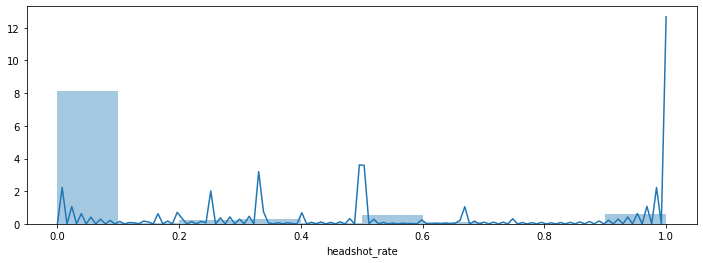

In [17]:
# Plot the distribution of headshot_rate
plt.figure(figsize=(12,4))
sns.distplot(df_data['headshot_rate'], bins=10)
plt.show()

## Feature extraction

### Categorical Variables 

We will one hot encode the 'matchType' feature to use it in our Random Forest model.

In [18]:
# One hot encode matchType
matchType_encoding = pd.get_dummies(df_data ['matchType'],prefix='matchType')
matchType_encoding.head()

,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [19]:
df_data = pd.concat([df_data,matchType_encoding],axis=1)

In [20]:
matchType_encoding.columns.tolist()

['matchType_duo',
 'matchType_duo-fpp',
 'matchType_solo',
 'matchType_solo-fpp',
 'matchType_squad',
 'matchType_squad-fpp']

In [21]:
#all features are analysized from above
kda_feature = ['DBNOs','assists','damageDealtNorm','headshotKills','killStreaks','killsNorm','longestKill','roadKills','teamKills','revives','headshot_rate']
distance_feature = ['rideDistance','swimDistance','walkDistance','totalDistance']
item_feature = ['boosts','heals','weaponsAcquired','vehicleDestroys']
match_feature = ['numGroups']
matchtype_feature = ['matchType_duo', 'matchType_duo-fpp', 'matchType_solo', 'matchType_solo-fpp', 'matchType_squad', 'matchType_squad-fpp']

In [22]:
# columns will all combined features
feature_columns= kda_feature + distance_feature + item_feature + match_feature + matchtype_feature
label_column = ['winPlacePerc']
data = df_data[feature_columns+label_column]
data.head()

,DBNOs,assists,damageDealtNorm,headshotKills,killStreaks,killsNorm,longestKill,roadKills,teamKills,revives,headshot_rate,rideDistance,swimDistance,walkDistance,totalDistance,boosts,heals,weaponsAcquired,vehicleDestroys,numGroups,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,winPlacePerc
0,0,0,0.0000,0,0,0.00,0.00,0,0,0,0.0,0.0000,0.00,244.80,244.8000,0,0,1,0,26,0,0,0,0,0,1,0.4444
1,0,0,128.9727,0,0,0.00,0.00,0,0,0,0.0,0.0045,11.04,1434.00,1445.0445,0,0,5,0,25,0,0,0,0,0,1,0.6400
2,0,1,85.6800,0,0,0.00,0.00,0,0,0,0.0,0.0000,0.00,161.80,161.8000,0,0,2,0,47,1,0,0,0,0,0,0.7755
3,0,0,47.0470,0,0,0.00,0.00,0,0,0,0.0,0.0000,0.00,202.70,202.7000,0,0,3,0,30,0,0,0,0,0,1,0.1667
4,0,0,107.0000,0,1,1.07,58.53,0,0,0,0.0,0.0000,0.00,49.75,49.7500,0,0,2,0,95,0,0,0,1,0,0,0.1875


# Preparation for Machine Learning <a id="8"></a>

## Sampling

We will take a sample of 500000 rows from our training set for easy debugging and exploration.  

The sampling will be based on the distribution of match type.

In [23]:
df_data['groupId'].unique()

array(['4d4b580de459be', '684d5656442f9e', '6a4a42c3245a74', ...,
       'ac3f1b4a56e5ad', '408cdb5c46b2ac', '8c74f72fedf5ff'], dtype=object)

In [24]:
sample_num =300000
sample_groupId = np.random.choice(df_data['groupId'].unique(),sample_num)

In [25]:
data_sample = df_data[df_data['groupId'].isin(sample_groupId)]

In [26]:
data_sample['matchType'].value_counts(normalize = True)

squad-fpp    0.361804
duo-fpp      0.248549
solo-fpp     0.146036
squad        0.121352
duo          0.075396
solo         0.046863
Name: matchType, dtype: float64

In [27]:
data_sample.to_csv('data_sample.csv',index=False)

## Split target variable, validation data, etc.

In [60]:
# calculate weight for each row by matchtype
sample_weights = (data_sample[matchtype_feature]*matchtype_dis).sum(axis=1)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# train and validation split based on the matchtype
X = data_sample[feature_columns]
y = data_sample[label_column[0]]
X_train, X_val, y_train, y_val  = train_test_split(X,y,test_size=0.10,
                                                     random_state=0, stratify=sample_weights)

In [63]:
X_train.shape

(450000, 26)

In [64]:
y_train.shape

(450000,)

#  Make a pipeline

In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline 

In [2]:
#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        # in case only one feature passed
        if isinstance(feature_names,list):
            self._feature_names = feature_names
        else:
            self._feature_names = [feature_names]
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 

In [ ]:
class FeatureTransformer(BaseEstimator, TransformerMixin):
    """
    """
    #Class Constructor
    def __init__( self ):
        pass
        
    #Return self, nothing else to do here
    def fit( self, X, y = None ):
        return self 
    
    #Custom transform method we wrote that creates aformentioned features and drops redundant ones 
    def transform(self, X, y = None):
        X =  X.copy() 
        
        # Create feature playersJoined
        X['playersJoined'] = X.groupby('matchId')['matchId'].transform('count')
        # Create feature totalDistance
        X['totalDistance'] = X['rideDistance'] + X['walkDistance'] + X['swimDistance']
        # Create feature killsWithoutMoving
        X['killsWithoutMoving'] = ((X['kills'] > 0) & (X['totalDistance'] == 0))
        # Remove outliers
        X.drop(X[X['killsWithoutMoving'] == True].index, inplace=True)
        

        return X

In [ ]:
bucket_columns= ['DBNOs', 'assists','headshotKills',
 'killStreaks','roadKills',
 'teamKills', 'revives','boosts',
 'heals','weaponsAcquired',
 'vehicleDestroys']
num_columns= ['matchType_duo',
 'matchType_duo-fpp',
 'matchType_solo',
 'matchType_solo-fpp',
 'matchType_squad',
 'matchType_squad-fpp']
numerical_columns= ['damageDealtNorm','killsNorm',
 'longestKill','rideDistance',
 'swimDistance',
 'walkDistance',
 'totalDistance','numGroups']

In [ ]:
#Defining the steps in the categorical pipeline 
bucket_pipeline = Pipeline(steps = [('bucket_selector', FeatureSelector(bucket_columns)),
                                ('bucket_encoder', KBinsDiscretizer(100,encode='onehot-dense'))])
numerical_pipeline = Pipeline(steps = [('num_selector', FeatureSelector(numerical_columns) ),
                                  ('std_scaler', StandardScaler())])


#Combining numerical and categorical piepline into one full big pipeline horizontally 
#using FeatureUnion
full_pipeline = FeatureUnion( transformer_list = [('bucket_pipeline', bucket_pipeline), 
                                                  ('numerical_pipeline', numerical_pipeline)])
                        

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
#introduce early stop conditons
from tensorflow import keras
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

def build_model(input_dim):
    # instantiate model
    model = Sequential()
    # we can think of this chunk as the input layer
    model.add(Dense(64, input_dim=input_dim,activation='relu'))
    # we can think of this chunk as the hidden layer    
    
    model.add(Dense(64,activation='relu'))   
    model.add(Dense(10,activation='relu'))

    # we can think of this chunk as the output layer
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
    return model
model = KerasClassifier(build_modelld_model(input_dim),epochs=10,batch_size=64, 
                  validation_data= validation_data, verbose = 1,callbacks=[early_stop])

# Demo

In [4]:
df_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
df_data.loc[df_data['matchType'].isin(['solo','solo-fpp'])].groupby('groupId').count()['Id'].value_counts()

1     674978
2      14324
3       1586
4        433
5        136
15        89
14        85
16        77
       ...  
8         18
10        17
7         15
19        13
9          8
21         1
20         1
64         1
Name: Id, Length: 22, dtype: int64

In [10]:
df_data[df_data['groupId']=='0000b3a8f7db43']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
51811,c75ea243756195,0000b3a8f7db43,37714fcfd3476f,0,0,40.63,0,0,0,94,1030,0,0,0.0,1971,duo-fpp,49,49,-1,0,0.0,0,0.0,0,0,90.19,1,1476,0.0417
2381631,e057bef5bdf321,0000b3a8f7db43,37714fcfd3476f,0,0,0.00,0,0,0,93,1062,0,0,0.0,1971,duo-fpp,49,49,-1,0,0.0,0,0.0,0,0,138.30,2,1503,0.0417
2988022,bf4df92b11125b,0000b3a8f7db43,37714fcfd3476f,0,0,0.00,0,0,0,92,1338,0,0,0.0,1971,duo-fpp,49,49,-1,0,0.0,0,0.0,0,0,128.90,2,1618,0.0417


In [7]:
df_data[df_data['matchId']=='b30f3d87189aa6']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
51361,993cf1860ef998,14d6b54cdec6bc,b30f3d87189aa6,0,0,100.00,1,0,0,36,0,1,1,3.172,1875,normal-squad-fpp,2,2,1500,0,0.0,0,0.0,0,0,129.3,2,0,0.0
87328,951585445b1a5e,14d6b54cdec6bc,b30f3d87189aa6,0,0,0.00,0,0,0,79,0,0,0,0.000,1875,normal-squad-fpp,2,2,1500,0,0.0,0,0.0,0,0,558.4,4,0,0.0
130067,fea1ba100257c6,14d6b54cdec6bc,b30f3d87189aa6,3,1,172.60,0,0,5,74,0,0,0,0.000,1875,normal-squad-fpp,2,2,1500,0,0.0,0,0.0,0,0,719.5,3,0,0.0
205499,1fdda14a234636,14d6b54cdec6bc,b30f3d87189aa6,0,0,100.00,1,0,0,30,0,1,1,7.947,1875,normal-squad-fpp,2,2,1500,0,1332.0,0,0.0,0,0,2640.0,10,0,0.0
214626,83d52b34e255c8,14d6b54cdec6bc,b30f3d87189aa6,0,1,91.27,0,0,0,45,0,0,0,0.000,1875,normal-squad-fpp,2,2,1500,0,5074.0,0,0.0,0,0,2428.0,7,0,0.0
251660,1ea11b8d9391fa,14d6b54cdec6bc,b30f3d87189aa6,0,0,77.79,1,0,0,33,0,1,1,153.600,1875,normal-squad-fpp,2,2,1500,0,1454.0,0,0.0,0,0,812.9,9,0,0.0
306407,71f2815716b1ed,14d6b54cdec6bc,b30f3d87189aa6,0,0,0.00,0,0,0,65,0,0,0,0.000,1875,normal-squad-fpp,2,2,1500,0,1342.0,0,0.0,0,0,1051.0,8,0,0.0
388016,9fa22ae449cbc5,0aef53445f8793,b30f3d87189aa6,3,1,96.28,1,0,11,40,0,0,0,0.000,1875,normal-squad-fpp,2,2,1500,0,1176.0,0,0.0,0,0,4309.0,10,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969236,983af8386102be,14d6b54cdec6bc,b30f3d87189aa6,0,0,57.71,1,0,0,34,0,1,1,206.700,1875,normal-squad-fpp,2,2,1500,0,0.0,0,0.0,0,0,788.4,4,0,0.0
